# IPython 与 RQAlpha

## 加载 RQAlpha magic

In [1]:
%load_ext rqalpha

## 查看 RQAlpha magic 帮助

我们可以通过 `%%rqalpha` 直接在 `cell` 中运行回测代码。 `%%rqalpha` 后面的参数等价于在 CLI 中后面的 `rqalpha run` 的参数

In [2]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --dividend-reinvestment         enable dividend r

## 使用 %%rqalpha 进行回测

2018-01-10 INFO positions hs300: 0, zz500: 15, gz: 0
2018-01-11 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-12 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-15 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-16 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-17 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-18 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-19 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-22 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-23 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-24 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-25 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-26 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-29 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-30 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-31 INFO positions hs300: 23, zz500: 0, gz: 0
2018-02-01 INFO positions hs300: 23, zz500: 0, gz: 0
2018-02-02 INFO positions hs300: 23, zz500: 0, gz: 0
2018-02-05 INFO positions hs300: 23, zz500: 0,

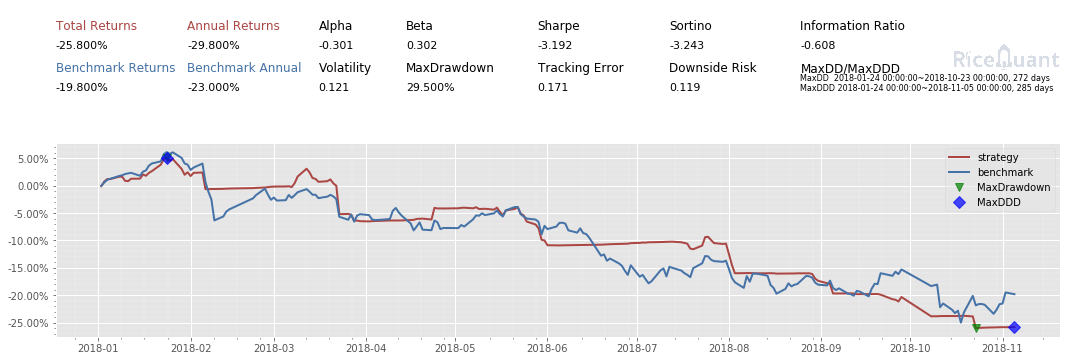

In [3]:
%%rqalpha -s 20180101 -e 20181105 -p -bm 000001.XSHG --account stock 100000

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

## 获取回测报告

运行完回测后，报告会自动存储到 `report` 变量中。可以直接通过 `report` 变量获取当次回测的结果。

另外 rqalpha 的 mod 的输出会自动存储在 `results` 变量中。

In [4]:
results.keys()

dict_keys(['sys_analyser'])

In [5]:
report.keys()

dict_keys(['summary', 'trades', 'portfolio', 'benchmark_portfolio', 'stock_account', 'stock_positions'])

In [6]:
report.trades[:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2018-01-02 15:00:00,75.986760,1542884059,6332.23,15,000905.XSHG,1542884058,None,BUY,中证500,0,2018-01-02 15:00:00,75.986760
2018-01-10 15:00:00,76.871280,1542884060,6405.94,15,000905.XSHG,1542884059,None,SELL,中证500,0,2018-01-10 15:00:00,76.871280
2018-01-10 15:00:00,77.423704,1542884061,4207.81,23,000300.XSHG,1542884060,None,BUY,沪深300,0,2018-01-10 15:00:00,77.423704
2018-02-06 15:00:00,76.339576,1542884062,4148.89,23,000300.XSHG,1542884061,None,SELL,沪深300,0,2018-02-06 15:00:00,76.339576
2018-02-06 15:00:00,79.508352,1542884063,161.34,616,000012.XSHG,1542884062,None,BUY,国债指数,0,2018-02-06 15:00:00,79.508352


In [7]:
report.portfolio[:5]

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2018-01-02,4940.563,94983.45,1.000,99924.013,0.999240,100000.0
2018-01-03,4940.563,95823.75,0.999,100764.313,1.007643,100000.0
2018-01-04,4940.563,96263.10,1.008,101203.663,1.012037,100000.0
2018-01-05,4940.563,96258.75,1.012,101199.313,1.011993,100000.0
2018-01-08,4940.563,96692.70,1.012,101633.263,1.016333,100000.0


In [8]:
report.stock_positions[:5]

,avg_price,last_price,market_value,order_book_id,quantity,symbol
date,,,,,,
2018-01-02,6332.23,6332.23,94983.45,000905.XSHG,15,中证500
2018-01-03,6332.23,6388.25,95823.75,000905.XSHG,15,中证500
2018-01-04,6332.23,6417.54,96263.10,000905.XSHG,15,中证500
2018-01-05,6332.23,6417.25,96258.75,000905.XSHG,15,中证500
2018-01-08,6332.23,6446.18,96692.70,000905.XSHG,15,中证500


## 使用 run_func 运行回测

[2018-11-22 18:54:30.088474] WARN: system_log: Missing Chinese fonts. Fallback to English.


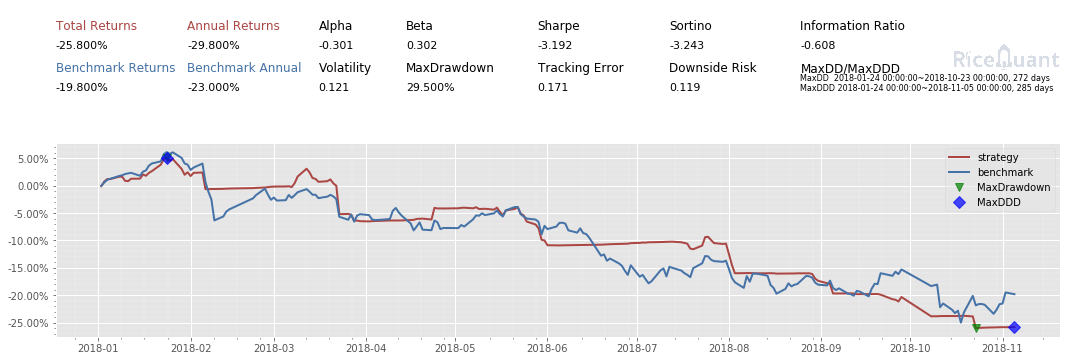

In [9]:
config = {
  "base": {
    "start_date": "2018-01-01",
    "end_date": "2018-11-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func


def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        
        
results = run_func(init=init, handle_bar=handle_bar, config=config)

In [10]:
report = results["sys_analyser"]

In [11]:
report["trades"][:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2018-01-02 15:00:00,75.986760,1542884140,6332.23,15,000905.XSHG,1542884139,None,BUY,中证500,0,2018-01-02 15:00:00,75.986760
2018-01-10 15:00:00,76.871280,1542884141,6405.94,15,000905.XSHG,1542884140,None,SELL,中证500,0,2018-01-10 15:00:00,76.871280
2018-01-10 15:00:00,77.423704,1542884142,4207.81,23,000300.XSHG,1542884141,None,BUY,沪深300,0,2018-01-10 15:00:00,77.423704
2018-02-06 15:00:00,76.339576,1542884143,4148.89,23,000300.XSHG,1542884142,None,SELL,沪深300,0,2018-02-06 15:00:00,76.339576
2018-02-06 15:00:00,79.508352,1542884144,161.34,616,000012.XSHG,1542884143,None,BUY,国债指数,0,2018-02-06 15:00:00,79.508352
